# City Comparison Analysis: Water Cost, Gym Memberships, and Quality of Life (2021)
#### By: Lucas Ying
#### 2/13/24

https://www.kaggle.com/datasets/prasertk/healthy-lifestyle-cities-report-2021/data


# Data Exploration

* Load and read the dataset
* Better understand the columns (features) of your data
* Notice data types, unique values, null values, duplicates, etc.
* Determine if the dataset is worth exploring further or return to Selecting a Dataset

In [407]:
import pandas as pd

In [408]:
df = pd.read_csv("data/healthy_lifestyle_city_2021.csv")

In [409]:
print(df.head())  # Display first few rows
print("")
print(df.info())  # Get information about columns and data types
print("")
print(df.describe())  # Get summary statistics
print("")
df.columns # Display Columns

         City  Rank Sunshine hours(City) Cost of a bottle of water(City)  \
0   Amsterdam     1                 1858                           £1.92   
1      Sydney     2                 2636                           £1.48   
2      Vienna     3                 1884                           £1.94   
3   Stockholm     4                 1821                           £1.72   
4  Copenhagen     5                 1630                           £2.19   

  Obesity levels(Country)  Life expectancy(years) (Country)  \
0                  20.40%                              81.2   
1                  29.00%                              82.1   
2                  20.10%                              81.0   
3                  20.60%                              81.8   
4                  19.70%                              79.8   

  Pollution(Index score) (City) Annual avg. hours worked  \
0                         30.93                     1434   
1                         26.86             

Index(['City', 'Rank', 'Sunshine hours(City)',
       'Cost of a bottle of water(City)', 'Obesity levels(Country)',
       'Life expectancy(years) (Country)', 'Pollution(Index score) (City)',
       'Annual avg. hours worked', 'Happiness levels(Country)',
       'Outdoor activities(City)', 'Number of take out places(City)',
       'Cost of a monthly gym membership(City)'],
      dtype='object')

In [410]:
print(df.dtypes)  # Display data types of each column
print("")
print(df.nunique())  # Count unique values in each column
print("")
print(df.isnull().sum())  # Count null values in each column
print("")
print(df.duplicated().sum())  # Count duplicate rows

City                                       object
Rank                                        int64
Sunshine hours(City)                       object
Cost of a bottle of water(City)            object
Obesity levels(Country)                    object
Life expectancy(years) (Country)          float64
Pollution(Index score) (City)              object
Annual avg. hours worked                   object
Happiness levels(Country)                 float64
Outdoor activities(City)                    int64
Number of take out places(City)             int64
Cost of a monthly gym membership(City)     object
dtype: object

City                                      44
Rank                                      44
Sunshine hours(City)                      40
Cost of a bottle of water(City)           39
Obesity levels(Country)                   28
Life expectancy(years) (Country)          27
Pollution(Index score) (City)             44
Annual avg. hours worked                  23
Happiness levels(Country)

In [411]:
# Allows me to see all the data in one spot
df.head(44)

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540,7.80,113,309,£35.23
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386,7.07,254,1729,£26.11
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686,6.40,585,2344,£37.80
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670,7.23,218,788,£31.04


Based off this early understanding I have gained of my dataset, I believe that this dataset  is worth futher exploring to possibly find trends that determine higher ranked cities and determine which cities have certain statistical attributes. Additionally, the data looks fairly clean and usable other than the missing values throughout the data.

# Data Cleaning

* Remove or Add columns (features) as needed
* Format Strings
* Remove Duplicates
* Drop/impute null values
* Document what you’re doing as you go

In [412]:
import pandas as pd

In [413]:
df = pd.read_csv("data/healthy_lifestyle_city_2021.csv")

#### Annual Average hours worked

In [414]:
# Executed value counts function to find me the number of none or missing values there are.
df["Annual avg. hours worked"].value_counts()


Annual avg. hours worked
-       11
1779     6
1644     2
1386     2
1686     2
1670     2
1712     2
1557     2
1434     1
1965     1
1718     1
1538     1
1505     1
1583     1
1772     1
1967     1
1832     1
1898     1
1540     1
1380     1
1452     1
1501     1
2137     1
Name: count, dtype: int64

There are 11 pieces of missing data in the 'Annual avg. hours worked' column. I can replace these missing values with "None" by mapping them to "None".

In [415]:
# Map missing values to None
def hours_worked_to_none(word):
    if word in ["-"]:
        return None
    return word

df["Annual avg. hours worked"] = df["Annual avg. hours worked"].map(hours_worked_to_none)
df["Annual avg. hours worked"].value_counts()

Annual avg. hours worked
1779    6
1557    2
1644    2
1386    2
1686    2
1670    2
1712    2
1965    1
1718    1
1538    1
1505    1
1583    1
1772    1
1434    1
1832    1
1898    1
1967    1
1540    1
1380    1
1452    1
1501    1
2137    1
Name: count, dtype: int64

Now they are all mapped to None and I don't have to worry about those missing values.

#### Sunshine hours(City)

In [416]:
# Looking for missing data in the Sunshine hours column
print(df["Sunshine hours(City)"].isna().sum())
print("")
print(df["Sunshine hours(City)"].value_counts())


0

Sunshine hours(City)
1662    3
2769    2
2066    2
1858    1
3062    1
1453    1
1877    1
2508    1
1836    1
1776    1
1546    1
1566    1
2003    1
2584    1
1633    1
3124    1
1915    1
2528    1
2535    1
1901    1
2634    1
1405    1
3254    1
2636    1
1884    1
1821    1
1630    1
1626    1
2591    1
1938    1
2363    1
2671    1
2624    1
2525    1
2983    1
-       1
3311    1
2218    1
3542    1
2555    1
Name: count, dtype: int64


These results were not convincing because when looking at my data earlier I noticed that there was a missing piece of data in this column.

In [417]:
# Map missing values to None
def hours_worked_to_none(word):
    if word in ["-"]:
        print("missing piece of data")
        return None
    return word

df["Sunshine hours(City)"] = df["Sunshine hours(City)"].map(hours_worked_to_none)
df["Sunshine hours(City)"].value_counts()

missing piece of data


Sunshine hours(City)
1662    3
2769    2
2066    2
1858    1
3062    1
1453    1
1877    1
2508    1
1836    1
1776    1
1546    1
1566    1
2003    1
2584    1
1633    1
3124    1
1915    1
2528    1
2535    1
1901    1
2634    1
1405    1
3254    1
2363    1
1884    1
1821    1
1630    1
1626    1
2591    1
1938    1
2671    1
2636    1
2624    1
2525    1
2983    1
3311    1
2218    1
3542    1
2555    1
Name: count, dtype: int64

Like I suspected based off eyeballing the data, there was one missing piece of data because I had the code print "missing piece of data" before returning as None if the data had a value that was "-" or a missing piece of data.

#### Pollution(Index score) (City)

In [418]:
# Map missing values to None
def hours_worked_to_none(word):
    if word in ["-"]:
        print("missing piece of data")
        return None
    return word

df["Pollution(Index score) (City)"] = df["Pollution(Index score) (City)"].map(hours_worked_to_none)
df["Pollution(Index score) (City)"].value_counts()

missing piece of data


Pollution(Index score) (City)
30.93    1
47.36    1
82.84    1
27.03    1
40.07    1
42.84    1
43.33    1
67.46    1
77.40    1
62.67    1
65.10    1
49.32    1
79.78    1
17.31    1
58.91    1
61.83    1
67.19    1
39.18    1
57.36    1
57.63    1
66.07    1
91.74    1
26.86    1
85.43    1
17.33    1
19.63    1
21.24    1
13.08    1
39.41    1
65.19    1
24.26    1
25.90    1
76.64    1
69.49    1
52.64    1
37.83    1
52.68    1
84.39    1
57.82    1
37.78    1
27.25    1
47.28    1
82.78    1
Name: count, dtype: int64

This time I skipped the part where I tried to find missing data because I already knew from looking at the data that these were the columns with missing values. Thus, I immediatley mapped the missing values to None.

In [419]:
# count the duplicated rows
df.duplicated().sum()

0

There are zero duplicates, thus there is no duplicates I need to remove or deal with in this dataset.

In [420]:
# ChatGPT assisted coding this part:

# Remove pound sign and convert Cost of a bottle of water(City) to numeric
df['Cost of a bottle of water(City)'] = df['Cost of a bottle of water(City)'].str.replace('£', '')
df['Cost of a bottle of water(City)'] = pd.to_numeric(df['Cost of a bottle of water(City)'], errors='coerce')

# Remove pound sign and convert Cost of a monthly gym membership(City) to numeric
df['Cost of a monthly gym membership(City)'] = df['Cost of a monthly gym membership(City)'].str.replace('£', '')
df['Cost of a monthly gym membership(City)'] = pd.to_numeric(df['Cost of a monthly gym membership(City)'], errors='coerce')

# Check the updated DataFrame
df.head(44)

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,1.92,20.40%,81.2,30.93,1434,7.44,422,1048,34.90
1,Sydney,2,2636,1.48,29.00%,82.1,26.86,1712,7.22,406,1103,41.66
2,Vienna,3,1884,1.94,20.10%,81.0,17.33,1501,7.29,132,1008,25.74
3,Stockholm,4,1821,1.72,20.60%,81.8,19.63,1452,7.35,129,598,37.31
4,Copenhagen,5,1630,2.19,19.70%,79.8,21.24,1380,7.64,154,523,32.53
5,Helsinki,6,1662,1.60,22.20%,80.4,13.08,1540,7.80,113,309,35.23
6,Fukuoka,7,2769,0.78,4.30%,83.2,None,1644,5.87,35,539,55.87
7,Berlin,8,1626,1.55,22.30%,80.6,39.41,1386,7.07,254,1729,26.11
8,Barcelona,9,2591,1.19,23.80%,82.2,65.19,1686,6.40,585,2344,37.80
9,Vancouver,10,1938,1.08,29.40%,81.7,24.26,1670,7.23,218,788,31.04


I actually realized later on in my data analysis that in order to work with the cost of water and gym memberships columns, I would need to convert them to solely a number and remove the pound sign.

# Exploratory and Statistical Data Analysis
PS: I put both my statistical analysis and exploratory data analysis in the same section because while I was doing my exploratory data analysis I analyze the statistical relationships based on the histograms, scatterplots, and boxplots I was creating.
## Questions answered:
* Question 1: Which city holds the highest price for a bottle of water?
* Question 2: Which city holds the highest price for a monthly gym membership?
* Question 3: Which city has the highest number of outdoor activities?


In [421]:
import matplotlib.pyplot as plt
import seaborn as sns

In [422]:
print(df.columns)


Index(['City', 'Rank', 'Sunshine hours(City)',
       'Cost of a bottle of water(City)', 'Obesity levels(Country)',
       'Life expectancy(years) (Country)', 'Pollution(Index score) (City)',
       'Annual avg. hours worked', 'Happiness levels(Country)',
       'Outdoor activities(City)', 'Number of take out places(City)',
       'Cost of a monthly gym membership(City)'],
      dtype='object')


In [423]:
df.sort_values('Happiness levels(Country)', ascending=False)

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
5,Helsinki,6,1662,1.60,22.20%,80.4,13.08,1540,7.80,113,309,35.23
4,Copenhagen,5,1630,2.19,19.70%,79.8,21.24,1380,7.64,154,523,32.53
36,Zurich,37,1566,3.20,19.50%,82.6,17.31,1557,7.56,69,538,73.11
19,Geneva,20,None,2.62,19.50%,82.6,27.25,1557,7.56,44,444,70.00
0,Amsterdam,1,1858,1.92,20.40%,81.2,30.93,1434,7.44,422,1048,34.90
3,Stockholm,4,1821,1.72,20.60%,81.8,19.63,1452,7.35,129,598,37.31
2,Vienna,3,1884,1.94,20.10%,81.0,17.33,1501,7.29,132,1008,25.74
9,Vancouver,10,1938,1.08,29.40%,81.7,24.26,1670,7.23,218,788,31.04
14,Toronto,15,2066,1.09,29.40%,81.7,37.83,1670,7.23,174,1656,32.64
10,Melbourne,11,2363,1.57,29.00%,82.1,25.90,1712,7.22,243,813,36.89


First thing I did after cleaning my data was look at the data from the happiest to least happy cities. This was my first thought when I saw the dataset that the rankings of the cities would most likely correspond to happiness, but that wasn't the case. 

Based off of my understanding of the dataset, the study created rankings for all of these cities based off numerous statistical factors that equated to their ranking.

#### Happiness Levels vs City Ranking

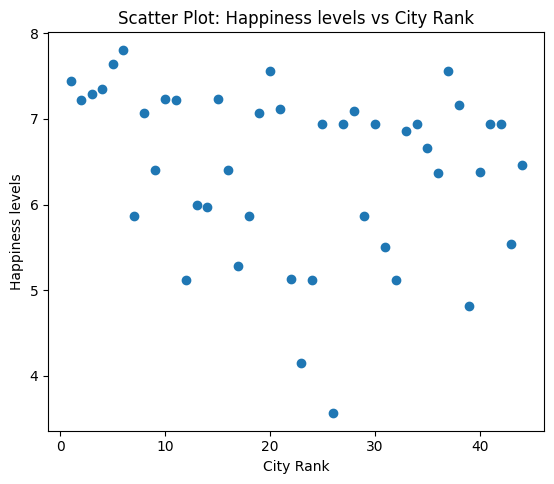

In [424]:
# Filter out rows with None values
filtered_df = df[(df['Rank'].notna()) & (df['Happiness levels(Country)'].notna())]
# Filter the data so that the happiness levels are ranked from highest to lowest on the y axis
filtered_df = filtered_df.sort_values(by='Happiness levels(Country)', ascending=True)

# Create scatterplot
plt.scatter(filtered_df['Rank'], filtered_df['Happiness levels(Country)'],)
plt.title('Scatter Plot: Happiness levels vs City Rank')
plt.ylabel('Happiness levels')
plt.xlabel('City Rank')

# Rotate y-axis labels, add more spacing, and adjust font size
plt.yticks(rotation=0, horizontalalignment='right', fontsize=10)  # Adjust the angle, alignment, and font size
plt.subplots_adjust(bottom=0.05)  # Adjust the bottom margin to provide more space for labels

plt.show()

As expected, the higher ranked cities tended to have happier levels of happiness. However, this was a trend but not a neccesity in determining a high ranking city because there was one top 10 ranking city with a happiness level under 6. Also, some countries with extremely high happiness levels were ranked at the end of the list.

#### Happiness Levels Histogram

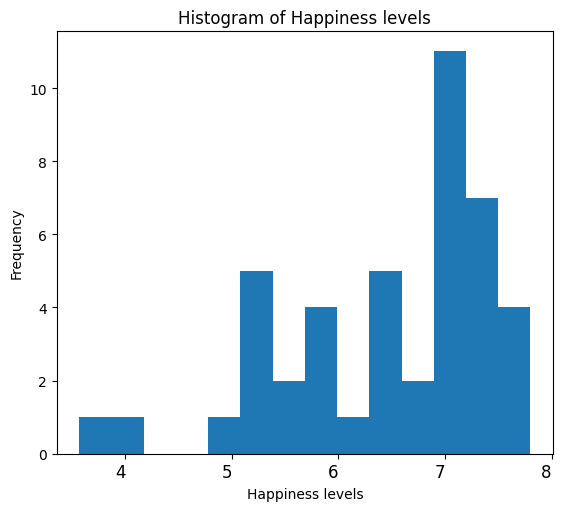

In [425]:

# Filter the data so that the happiness levels are ranked from highest to lowest on the y axis
filtered_df = filtered_df.sort_values(by='Happiness levels(Country)', ascending=True)

# Histogram for 'Sunshine hours(City)'
plt.hist(filtered_df['Happiness levels(Country)'].dropna(), bins=14)
plt.title('Histogram of Happiness levels')
plt.xlabel('Happiness levels')
plt.ylabel('Frequency')

# Rotate y-axis labels, add more spacing, and adjust font size
plt.xticks(rotation=0, horizontalalignment='right', fontsize=12)  # Adjust the angle, alignment, and font size
plt.subplots_adjust(bottom=0.0001)  # Adjust the bottom margin to provide more space for labels

plt.show()

As shown in the histogram, the happiness levels are more commonly shown to have happiness levels between 5-8. Although, some are still less than 5 majority lie within this range.

#### Cost of Bottle of Water

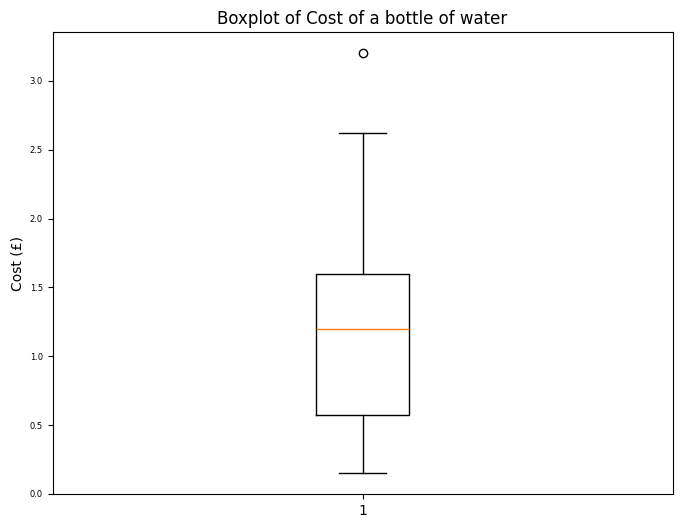

In [426]:
# Filter the data so that the price of a bottle of water is ranked from highest to lowest on the y axis
filtered_df = filtered_df.sort_values(by='Cost of a bottle of water(City)', ascending=False)


# Boxplot for 'Cost of a bottle of water(City)'
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_df['Cost of a bottle of water(City)'].dropna())
plt.title('Boxplot of Cost of a bottle of water')
plt.ylabel('Cost (£)')

# Rotate y-axis labels, add more spacing, and adjust font size
plt.yticks(rotation=0, horizontalalignment='right', fontsize=6)  # Adjust the angle, alignment, and font size as needed

plt.show()

The box plot allows you to see some basic statistics regarding a bottle of water and the price of it among these 44 cities. However, there was one bottle priced at 3.2 which is high in comparison to the rest of the prices.

In [427]:
# ChatGPT
# Highest cost for bottle of water
max_water_cost = df["Cost of a bottle of water(City)"].max()
city_with_max_water_cost = df[df["Cost of a bottle of water(City)"] == max_water_cost]["City"].values[0]

print("Question 1 - City with the maximum water cost:", city_with_max_water_cost)

Question 1 - City with the maximum water cost: Zurich


Question 1 - Zurich had the highest cost for bottle of water which actually makes sense after I did some research on the city and learned that it is ranked the 14th wealthiest city in the world according to Henley and Partners.

In [428]:
print("max:", df["Cost of a bottle of water(City)"].max())
print("min:", df["Cost of a bottle of water(City)"].min())
print("median:", df["Cost of a bottle of water(City)"].median())
print("range:", df["Cost of a bottle of water(City)"].max()-df["Cost of a bottle of water(City)"].min())
print("standard deviation:", df["Cost of a bottle of water(City)"].std())
print("variance:", df["Cost of a bottle of water(City)"].var())

max: 3.2
min: 0.15
median: 1.1949999999999998
range: 3.0500000000000003
standard deviation: 0.7186419465612162
variance: 0.5164462473572938


#### Cost of Monthly Gym Membership

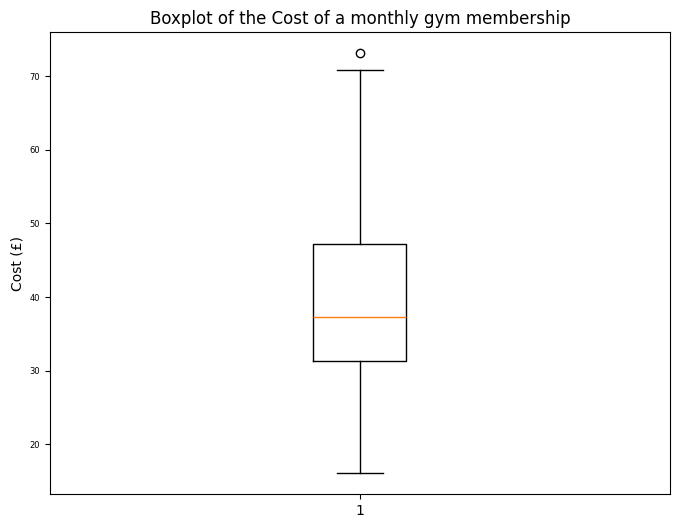

In [429]:
# Filter the data so that the price of a bottle of water is ranked from highest to lowest on the y axis
filtered_df = filtered_df.sort_values(by='Cost of a monthly gym membership(City)', ascending=False)


# Boxplot for 'Cost of a bottle of water(City)'
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_df['Cost of a monthly gym membership(City)'].dropna())
plt.title('Boxplot of the Cost of a monthly gym membership')
plt.ylabel('Cost (£)')

# Rotate y-axis labels, add more spacing, and adjust font size
plt.yticks(rotation=0, horizontalalignment='right', fontsize=6)  # Adjust the angle, alignment, and font size as needed

plt.show()

In [430]:
print("max:", df["Cost of a monthly gym membership(City)"].max())
print("min:", df["Cost of a monthly gym membership(City)"].min())
print("median:", df["Cost of a monthly gym membership(City)"].median())
print("range:", df["Cost of a monthly gym membership(City)"].max()-df["Cost of a monthly gym membership(City)"].min())
print("standard deviation:", df["Cost of a monthly gym membership(City)"].std())
print("variance:", df["Cost of a monthly gym membership(City)"].var())

max: 73.11
min: 16.07
median: 37.33
range: 57.04
standard deviation: 15.006457214797065
variance: 225.19375813953488


In [431]:
# ChatGPT
# Highest cost for gym membership
max_gym_cost = df["Cost of a monthly gym membership(City)"].max()
city_with_max_gym_cost = df[df["Cost of a monthly gym membership(City)"] == max_gym_cost]["City"].values[0]

print("Question 2 - City with the maximum gym membership monthly cost:", city_with_max_gym_cost)

Question 2 - City with the maximum gym membership monthly cost: Zurich


Question 2 - As expected, Zurich also leads in the highest monthly gym membership price of 73 pounds a month. Based on the findings on the cost of water, this result does not surprise me.

#### Sunshine Hours in Relation to Number of Outdoor Activities

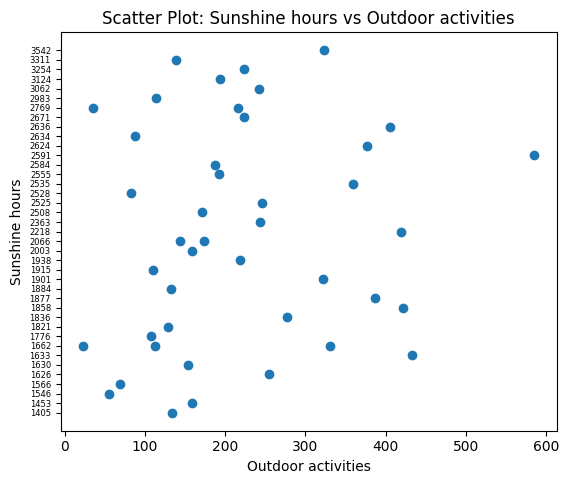

In [432]:
# ChatGPT helped me filter out the None values so I could create a scatterplot with the data.

# Filter out rows with None values in 'Sunshine hours(City)' and 'Outdoor activities(City)'
filtered_df = df[(df['Sunshine hours(City)'].notna()) & (df['Outdoor activities(City)'].notna())]
# Filter the data so that the Sunshine hours are ranked from highest to lowest on the y axis
filtered_df = filtered_df.sort_values(by='Sunshine hours(City)', ascending=True)

# Create scatterplot
plt.scatter(filtered_df['Outdoor activities(City)'], filtered_df['Sunshine hours(City)'],)
plt.title('Scatter Plot: Sunshine hours vs Outdoor activities')
plt.ylabel('Sunshine hours')
plt.xlabel('Outdoor activities')

# Rotate y-axis labels, add more spacing, and adjust font size
plt.yticks(rotation=0, horizontalalignment='right', fontsize=6)  # Adjust the angle, alignment, and font size
plt.subplots_adjust(bottom=0.05)  # Adjust the bottom margin to provide more space for labels

plt.show()

This scatterplot shows the lack of relationship between sunshine hours and outdoor activities. The results would most likely show that high sunshine hours leads to more time to do outdoor activities, but this is false and you can tell that the two have little affect on each other.

Next I want to see how the city with far more outdoor activities effects the happiness of the city.

In [433]:
max_outdoor_activities = df["Outdoor activities(City)"].max()
city_with_max_outdoor_activities = df[df["Outdoor activities(City)"] == max_outdoor_activities]["City"].values[0]

print("Question 3 - City with the most outdoor activiities:", city_with_max_outdoor_activities)

Question 3 - City with the most outdoor activiities: Barcelona


#### Happiness Levels in Relation to Number of Outdoor Activities

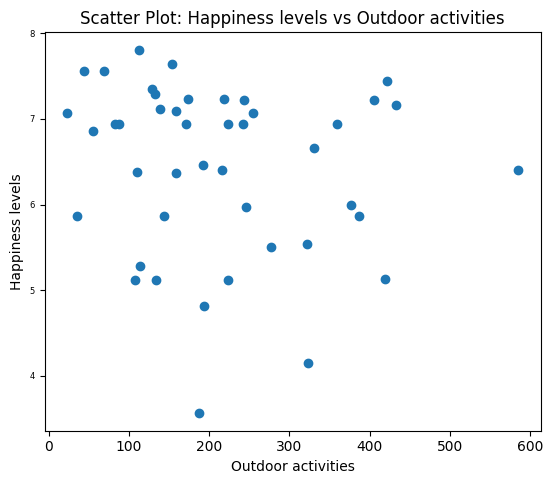

In [434]:
# Filter out rows with None values in 'Happiness levels(Country)' and 'Outdoor activities(City)'
filtered_df = df[(df['Happiness levels(Country)'].notna()) & (df['Outdoor activities(City)'].notna())]
# Filter the data so that the Happiness Levels are ranked from highest to lowest on the y axis
filtered_df = filtered_df.sort_values(by='Happiness levels(Country)', ascending=True)

# Create scatterplot
plt.scatter(filtered_df['Outdoor activities(City)'], filtered_df['Happiness levels(Country)'],)
plt.title('Scatter Plot: Happiness levels vs Outdoor activities')
plt.ylabel('Happiness levels')
plt.xlabel('Outdoor activities')

# Rotate y-axis labels, add more spacing, and adjust font size
plt.yticks(rotation=0, horizontalalignment='right', fontsize=6)  # Adjust the angle, alignment, and font size
plt.subplots_adjust(bottom=0.05)  # Adjust the bottom margin to provide more space for labels

plt.show()

Interestingly, this scatterplot and the sunshine hours vs outdoor activities scatter plot look slightly similar. Including a higher number of scattered data points in the top left region of the graph for both graphs. This tells me that outdoor activiites have a lower affect on the rankings than the prices of expenses in these cities.

Barcelona has both a high number of outdoor activities and high levels of happiness.

In [437]:
barcelona_rank = df[df["City"] == "Barcelona"]["Happiness levels(Country)"].values[0]
print("Happiness levels of Barcelona:", barcelona_rank)

Happiness levels of Barcelona: 6.4


In [435]:
barcelona_rank = df[df["City"] == "Barcelona"]["Rank"].values[0]
print("Rank of Barcelona:", barcelona_rank)

Rank of Barcelona: 9


This makes sense that with highest number of outdoor activities and higher end levels of happiness that Barcelona would rank in the top 10 cities.

#### Sunshine Hours vs City Ranking

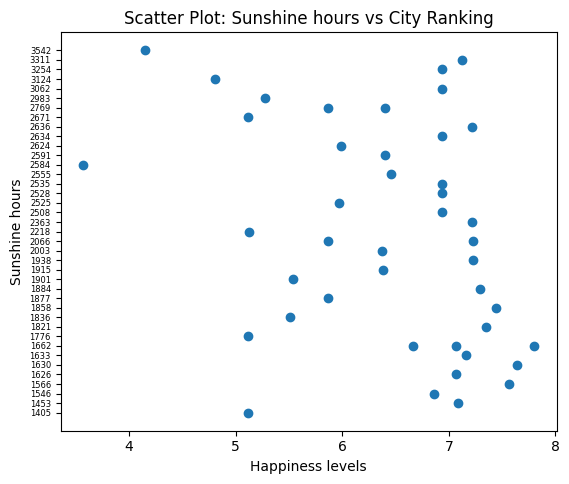

In [436]:
# ChatGPT helped me filter out the None values so I could create a scatterplot with the data.

# Filter out rows with None values in 'Sunshine hours(City)'
filtered_df = df[(df['Sunshine hours(City)'].notna())]
# Filter the data so that the Sunshine hours are ranked from highest to lowest on the y axis
filtered_df = filtered_df.sort_values(by='Sunshine hours(City)', ascending=True)

plt.scatter(filtered_df['Happiness levels(Country)'], filtered_df['Sunshine hours(City)'],)
plt.title('Scatter Plot: Sunshine hours vs City Ranking')
plt.ylabel('Sunshine hours')
plt.xlabel('Happiness levels')

# Rotate y-axis labels, add more spacing, and adjust font size
plt.yticks(rotation=0, horizontalalignment='right', fontsize=6)  # Adjust the angle, alignment, and font size
plt.subplots_adjust(bottom=0.05)  # Adjust the bottom margin to provide more space for labels

plt.show()

Although I suspected there may be a relationship between the happiness levels and sunshine hours being in correlation. There is actually no real relationship between the two columns of data.

## Future Steps

### Further Uses:
* ##### Explore additional urban metrics such as public transportation costs, healthcare access, and housing affordability

### Machine Learning Potential:
* #### I do not personally think it would be worth training a ML model on this dataset due to the limited number of cities in the dataset
* #### Training a machine learning model could help predict the quality of life based on the urban metrics in certain cities

